/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


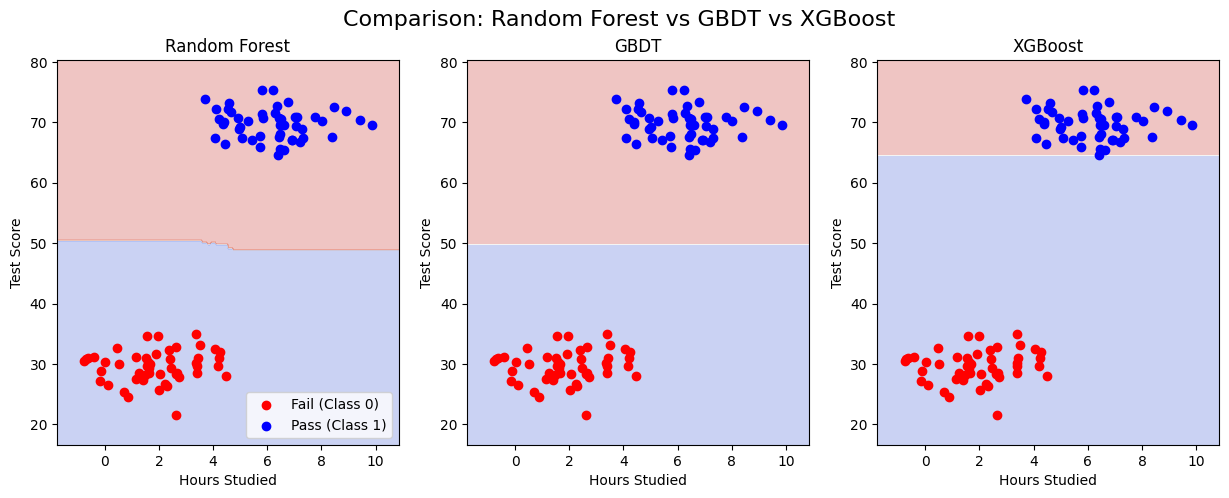

In [14]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Step 2: Create dataset
np.random.seed(42)
X0 = np.random.multivariate_normal([2, 30], [[2, 0.5], [0.5, 10]], 50)  # Class 0: Fail
X1 = np.random.multivariate_normal([6, 70], [[2, -0.5], [-0.5, 8]], 50) # Class 1: Pass
X = np.vstack((X0, X1))
y = np.array([0]*50 + [1]*50)

# Step 3: Define classifiers
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "GBDT": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,
                             reg_lambda=1.0, reg_alpha=0.0, use_label_encoder=False,
                             eval_metric="logloss", random_state=42)
}

# Step 4: Plot decision boundaries
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-5, X[:,1].max()+5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

plt.figure(figsize=(15,5))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X0[:,0], X0[:,1], color="red", label="Fail (Class 0)")
    plt.scatter(X1[:,0], X1[:,1], color="blue", label="Pass (Class 1)")
    plt.title(name)
    plt.xlabel("Hours Studied")
    plt.ylabel("Test Score")
    if i == 1:  # only first plot gets legend
        plt.legend()

plt.suptitle("Comparison: Random Forest vs GBDT vs XGBoost", fontsize=16)
plt.show()
